Here we are taking Apple Stock data 

In [3]:
import pandas_datareader as pdr
import datetime as dt

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
ticker = pdr.get_data_yahoo("AAPL", start, end)['Adj Close']
print(ticker)

Date
2019-12-31     72.443558
2020-01-02     74.096443
2020-01-03     73.376083
2020-01-06     73.960770
2020-01-07     73.612930
                 ...    
2021-08-30    153.119995
2021-08-31    151.830002
2021-09-01    152.509995
2021-09-02    153.649994
2021-09-03    154.300003
Name: Adj Close, Length: 424, dtype: float64


We adjusted 'ADJUSTED CLOSE' to split the stock and divide the payout

As we already know MACD is calculated by subtracting 26-period-EMA from 12-period-EMA
MACD = 12_period_EMA - 26_period_EMA

To calculate Exponential moving average (EMA)
Pandas have a function  'ewm()'

A nine day EMA of MACD called Signal Line. After plotting it acts as the signal to buy or sell the stock

In [5]:
exp1 = ticker.ewm(span=12, adjust=False).mean()
exp2 = ticker.ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()

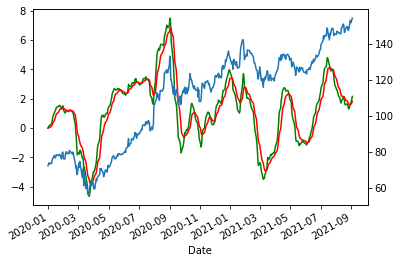

In [6]:
macd.plot(label='AAPL MACD', color='g')
ax = exp3.plot(label='Signal Line', color='r')
ticker.plot(ax=ax, secondary_y=True, label='AAPL')

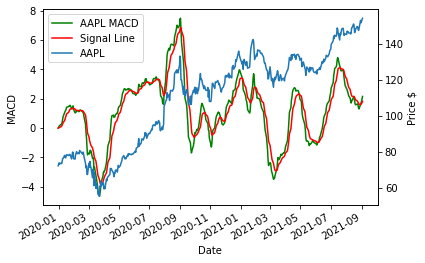

In [8]:
ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price $')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left')
plt.show()

When the signal line crosses the MACD line - it is time to sell if green is below & buy if it is above